In [37]:
!pip install pingouin
import numpy as np
import pandas as pd
import pingouin as pg
import re

In [2]:
!pip install nba_api
!pip install sportsreference

In [3]:
import requests

In [4]:
from nba_api.stats.static import players
player_dict = players.get_players()

# Use ternary operator or write function 
# Names are case sensitive
bron = [player for player in player_dict if player['full_name'] == 'LeBron James'][0]
bron_id = bron['id']

# find team Ids
from nba_api.stats.static import teams 
teams = teams.get_teams()
GSW = [x for x in teams if x['full_name'] == 'Golden State Warriors'][0]
GSW_id = GSW['id']

In [5]:
# First we import the endpoint
# We will be using pandas dataframes to manipulate the data
from nba_api.stats.endpoints import playergamelog
import pandas as pd 

#Call the API endpoint passing in lebron's ID & which season 
gamelog_bron = playergamelog.PlayerGameLog(player_id='2544', season = '2018')

#Converts gamelog object into a pandas dataframe
#can also convert to JSON or dictionary  
df_bron_games_2018 = gamelog_bron.get_data_frames()

# If you want all seasons, you must import the SeasonAll parameter 
from nba_api.stats.library.parameters import SeasonAll

gamelog_bron_all = playergamelog.PlayerGameLog(player_id='2544', season = SeasonAll.all)

df_bron_games_all = gamelog_bron_all.get_data_frames()

In [6]:
from nba_api.stats.endpoints import leaguegamefinder

#this time we convert it to a dataframe in the same line of code
GSW_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=GSW_id).get_data_frames()[0]

In [7]:
from nba_api.stats.endpoints import *
from nba_api.stats.library.parameters import *
wingspan13=draftcombineplayeranthro.DraftCombinePlayerAnthro(league_id='00',season_year='2013')
wingspan13_df = wingspan13.get_data_frames()
wingspan13 = pd.DataFrame(wingspan13_df[0])
wingspan13
wingspan14=draftcombineplayeranthro.DraftCombinePlayerAnthro(league_id='00',season_year='2014')
wingspan14_df = wingspan14.get_data_frames()
wingspan14 = pd.DataFrame(wingspan14_df[0])
wingspan14
wingspan15=draftcombineplayeranthro.DraftCombinePlayerAnthro(league_id='00',season_year='2015')
wingspan15_df = wingspan15.get_data_frames()
wingspan15 = pd.DataFrame(wingspan15_df[0])
wingspan15
wingspan16=draftcombineplayeranthro.DraftCombinePlayerAnthro(league_id='00',season_year='2016')
wingspan16_df = wingspan16.get_data_frames()
wingspan16 = pd.DataFrame(wingspan16_df[0])
wingspan16
wingspan17=draftcombineplayeranthro.DraftCombinePlayerAnthro(league_id='00',season_year='2017')
wingspan17_df = wingspan17.get_data_frames()
wingspan17 = pd.DataFrame(wingspan17_df[0])
#wingspan17

In [8]:
#shotchart = shotchartdetail.ShotChartDetail(context_measure_simple = 'TS_PCT',league_id='00',last_n_games=100,month='Jan',opponent_team_id='DEN',period=1,player_id='2544',season_type_all_star='Regular Season',team_id='LAL')
LAL = [x for x in teams if x['full_name'] == 'Los Angeles Lakers'][0]
LAL_id = LAL['id']
#teams

In [9]:
pd.set_option("display.max_columns", 999)
shotchart = shotchartdetail.ShotChartDetail(team_id = '0',player_id='0',date_from_nullable ='01/01/2019', date_to_nullable = '12/31/2019')
leagueshotchart = shotchart.get_data_frames()
leagueshotchartdf = pd.DataFrame(leagueshotchart[0])
leagueshotchartdf

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021800549,7,201586,Serge Ibaka,1610612761,Toronto Raptors,1,11,36,Made Shot,Turnaround Hook Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,1,20,1,1,20190101,TOR,UTA
1,Shot Chart Detail,0021800549,8,1628378,Donovan Mitchell,1610612762,Utah Jazz,1,11,23,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,6,2,1,1,20190101,TOR,UTA
2,Shot Chart Detail,0021800549,11,203497,Rudy Gobert,1610612762,Utah Jazz,1,10,50,Made Shot,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,2,1,1,20190101,TOR,UTA
3,Shot Chart Detail,0021800549,13,201980,Danny Green,1610612761,Toronto Raptors,1,10,34,Made Shot,Turnaround Bank Hook Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,12,1,1,1,20190101,TOR,UTA
4,Shot Chart Detail,0021800549,21,1627783,Pascal Siakam,1610612761,Toronto Raptors,1,10,5,Made Shot,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,2,3,1,1,20190101,TOR,UTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97106,Shot Chart Detail,0021900503,655,1629029,Luka Doncic,1610612742,Dallas Mavericks,4,2,57,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,27,-10,278,1,1,20191231,OKC,DAL
97107,Shot Chart Detail,0021900503,667,101108,Chris Paul,1610612760,Oklahoma City Thunder,4,1,59,Made Shot,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,23,-235,-3,1,1,20191231,OKC,DAL
97108,Shot Chart Detail,0021900503,682,1629029,Luka Doncic,1610612742,Dallas Mavericks,4,1,22,Made Shot,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,4,-2,48,1,1,20191231,OKC,DAL
97109,Shot Chart Detail,0021900503,683,101108,Chris Paul,1610612760,Oklahoma City Thunder,4,1,14,Made Shot,Driving Floating Jump Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,10,36,1,1,20191231,OKC,DAL


In [10]:
shotdefense1819 = playerdashptshotdefend.PlayerDashPtShotDefend(team_id = '0',player_id='0',season='2018-19')
shotdefenseget1819 = shotdefense1819.get_data_frames()
shotdefense1819df = pd.DataFrame(shotdefenseget1819[0])
shotdefense1819df
shotdefense1718 = playerdashptshotdefend.PlayerDashPtShotDefend(team_id = '0',player_id='0',season='2017-18')
shotdefenseget1718 = shotdefense1718.get_data_frames()
shotdefense1718df = pd.DataFrame(shotdefenseget1718[0])
shotdefense1718df
shotdefense1617 = playerdashptshotdefend.PlayerDashPtShotDefend(team_id = '0',player_id='0',season='2016-17')
shotdefenseget1617 = shotdefense1617.get_data_frames()
shotdefense1617df = pd.DataFrame(shotdefenseget1617[0])
shotdefense1617df
shotdefense1516 = playerdashptshotdefend.PlayerDashPtShotDefend(team_id = '0',player_id='0',season='2015-16')
shotdefenseget1516 = shotdefense1516.get_data_frames()
shotdefense1516df = pd.DataFrame(shotdefenseget1516[0])
shotdefense1516df
shotdefense1415 = playerdashptshotdefend.PlayerDashPtShotDefend(team_id = '0',player_id='0',season='2014-15')
shotdefenseget1415 = shotdefense1415.get_data_frames()
shotdefense1415df = pd.DataFrame(shotdefenseget1415[0])
shotdefense1415df

,CLOSE_DEF_PERSON_ID,GP,G,DEFENSE_CATEGORY,FREQ,D_FGM,D_FGA,D_FG_PCT,NORMAL_FG_PCT,PCT_PLUSMINUS
0,708,47,47,Overall,1.000,134.0,285.0,0.470,0.465,0.006
1,977,35,35,Overall,1.000,150.0,311.0,0.482,0.444,0.038
2,1495,77,77,Overall,1.000,450.0,1010.0,0.446,0.471,-0.026
3,1713,62,62,Overall,1.000,127.0,304.0,0.418,0.435,-0.018
4,1717,77,77,Overall,1.000,418.0,867.0,0.482,0.460,0.023
...,...,...,...,...,...,...,...,...,...,...
2935,202077,3,1,Greater Than 15 Ft,0.333,0.0,1.0,0.000,0.385,-0.385
2936,203945,3,3,Greater Than 15 Ft,0.750,2.0,3.0,0.667,0.358,0.309
2937,203961,1,0,Greater Than 15 Ft,NaN,NaN,NaN,NaN,NaN,NaN
2938,203944,1,0,Greater Than 15 Ft,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
from nba_api.stats.static import players
players = players.get_players()
[x for x in players]
players[0]['full_name']
player_name = None
player_list = []
x=0

for player in players:
    player_name = players[x]['full_name']
    player_list.append(player_name)
    x+=1


player_list


['Alaa Abdelnaby',
 'Zaid Abdul-Aziz',
 'Kareem Abdul-Jabbar',
 'Mahmoud Abdul-Rauf',
 'Tariq Abdul-Wahad',
 'Shareef Abdur-Rahim',
 'Tom Abernethy',
 'Forest Able',
 'John Abramovic',
 'Alex Abrines',
 'Alex Acker',
 'Donald Ackerman',
 'Mark Acres',
 'Charles Acton',
 'Quincy Acy',
 'Alvan Adams',
 'Don Adams',
 'Hassan Adams',
 'Jaylen Adams',
 'Jordan Adams',
 'Michael Adams',
 'Steven Adams',
 'Rafael Addison',
 'Bam Adebayo',
 'Deng Adel',
 'Rick Adelman',
 'Jeff Adrien',
 'Arron Afflalo',
 'Maurice Ager',
 'Mark Aguirre',
 'Blake Ahearn',
 'Danny Ainge',
 'Alexis Ajinca',
 'Henry Akin',
 'Josh Akognon',
 'DeVaughn Akoon-Purcell',
 'Solomon Alabi',
 'Mark Alarie',
 'Gary Alcorn',
 'Furkan Aldemir',
 'Cole Aldrich',
 'LaMarcus Aldridge',
 'Chuck Aleksinas',
 'Cliff Alexander',
 'Cory Alexander',
 'Courtney Alexander',
 'Gary Alexander',
 'Joe Alexander',
 'Kyle Alexander',
 'Victor Alexander',
 'Nickeil Alexander-Walker',
 'Steve Alford',
 'Rawle Alkins',
 'Bob Allen',
 'Grayson A

In [12]:
# playervplayer = playervsplayer.PlayerVsPlayer(vs_player_id='101108',player_id='2544')
# playervplayerget = playervplayer.get_data_frames()
# playervplayerdf = pd.DataFrame(playervplayerget[0])
# playervplayerdf

In [13]:
import json
#Converts gamelog object into a pandas dataframe
#can also convert to JSON or dictionary  
df_bron_games_2018 = gamelog_bron.get_data_frames()

# If you want all seasons, you must import the SeasonAll parameter 
from nba_api.stats.library.parameters import SeasonAll

gamelog_bron_all = playergamelog.PlayerGameLog(player_id='2544', season = SeasonAll.all)

bron_dict = gamelog_bron_all.get_dict() 
#print(df_bron_games_2018[0])
df = pd.DataFrame(df_bron_games_2018[0])
df

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22018,2544,0021801135,"MAR 29, 2019",LAL vs. CHA,W,32,11,19,0.579,4,7,0.571,1,2,0.500,0,3,3,9,0,0,6,1,27,14,1
1,22018,2544,0021801116,"MAR 26, 2019",LAL vs. WAS,W,34,11,20,0.550,1,6,0.167,0,2,0.000,0,7,7,14,1,0,3,1,23,3,1
2,22018,2544,0021801102,"MAR 24, 2019",LAL vs. SAC,W,35,9,22,0.409,3,6,0.500,8,9,0.889,2,9,11,11,2,1,4,1,29,5,1
3,22018,2544,0021801086,"MAR 22, 2019",LAL vs. BKN,L,37,8,25,0.320,1,7,0.143,8,12,0.667,3,6,9,14,1,1,8,3,25,-2,1
4,22018,2544,0021801042,"MAR 17, 2019",LAL @ NYK,L,35,11,26,0.423,0,6,0.000,11,13,0.846,2,4,6,8,0,1,2,2,33,9,2
5,22018,2544,0021801023,"MAR 14, 2019",LAL @ TOR,L,32,12,23,0.522,1,5,0.200,4,7,0.571,0,4,4,6,1,0,4,2,29,0,1
6,22018,2544,0021801009,"MAR 12, 2019",LAL @ CHI,W,33,15,23,0.652,2,4,0.500,4,5,0.800,1,9,10,4,2,0,5,2,36,9,1
7,22018,2544,0021800989,"MAR 09, 2019",LAL vs. BOS,L,28,13,23,0.565,1,5,0.200,3,7,0.429,2,8,10,12,0,0,3,0,30,11,1
8,22018,2544,0021800974,"MAR 06, 2019",LAL vs. DEN,L,31,13,22,0.591,2,7,0.286,3,8,0.375,0,7,7,7,1,1,4,4,31,-8,1
9,22018,2544,0021800958,"MAR 04, 2019",LAL vs. LAC,L,42,9,18,0.500,1,6,0.167,8,12,0.667,0,8,8,6,1,1,2,3,27,-11,1


In [14]:
draftclass13 = pd.merge(left=shotdefense1415df,right=wingspan13,how='left',left_on='CLOSE_DEF_PERSON_ID',right_on='PLAYER_ID')
draftclass13 = draftclass13.dropna(subset=['PLAYER_NAME'])
draftclass14 = pd.merge(left=shotdefense1516df,right=wingspan14,how='left',left_on='CLOSE_DEF_PERSON_ID',right_on='PLAYER_ID')
draftclass14 = draftclass14.dropna(subset=['PLAYER_NAME'])
draftclass15 = pd.merge(left=shotdefense1617df,right=wingspan15,how='left',left_on='CLOSE_DEF_PERSON_ID',right_on='PLAYER_ID')
draftclass15 = draftclass15.dropna(subset=['PLAYER_NAME'])
draftclass16 = pd.merge(left=shotdefense1718df,right=wingspan16,how='left',left_on='CLOSE_DEF_PERSON_ID',right_on='PLAYER_ID')
draftclass16 = draftclass16.dropna(subset=['PLAYER_NAME'])
draftclass17 = pd.merge(left=shotdefense1819df,right=wingspan17,how='left',left_on='CLOSE_DEF_PERSON_ID',right_on='PLAYER_ID')
draftclass17 = draftclass17.dropna(subset=['PLAYER_NAME'])
allclasses = pd.concat([draftclass13,draftclass14,draftclass15,draftclass16,draftclass17])
allclasses.head()

,CLOSE_DEF_PERSON_ID,GP,G,DEFENSE_CATEGORY,FREQ,D_FGM,D_FGA,D_FG_PCT,NORMAL_FG_PCT,PCT_PLUSMINUS,TEMP_PLAYER_ID,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,POSITION,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH
365,203318,5,5,Overall,1.0,7.0,11.0,0.636,0.411,0.226,None,203318.0,Glen,Rice,Glen Rice,SF-SG,76.50,6' 4.5'',77.75,6' 5.75'',210.8,81.25,6' 9.25'',101.5,8' 5.5'',8.45,8.50,9.00
367,203457,75,75,Overall,1.0,446.0,951.0,0.469,0.468,0.001,None,203457.0,Nerlens,Noel,Nerlens Noel,C,82.00,6' 10'',83.75,6' 11.75'',206.4,87.75,7' 3.75'',110.0,9' 2'',4.15,9.50,10.00
368,203458,68,68,Overall,1.0,338.0,734.0,0.460,0.470,-0.009,None,203458.0,Alex,Len,Alex Len,C,NaN,None,NaN,None,None,87.50,7' 3.5'',NaN,None,6.40,9.00,10.75
369,203459,47,47,Overall,1.0,85.0,210.0,0.405,0.425,-0.020,None,203459.0,Allen,Crabbe,Allen Crabbe,SG,77.25,6' 5.25'',78.25,6' 6.25'',197.4,83.25,6' 11.25'',103.5,8' 7.5'',4.65,8.25,8.50
370,203460,67,67,Overall,1.0,185.0,462.0,0.400,0.444,-0.043,None,203460.0,Andre,Roberson,Andre Roberson,PF-SF,78.25,6' 6.25'',79.00,6' 7'',205.8,83.00,6' 11'',104.5,8' 8.5'',7.05,8.75,9.50


In [15]:
##We suspect that the relationship between Standing Reach and Defensive RPM

(-0.7889999999999999, 0.8999999999999999)

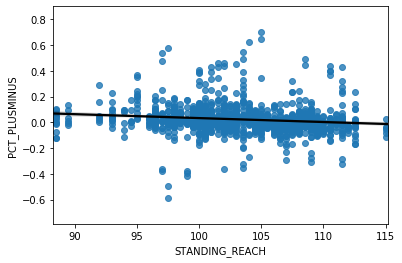

In [16]:
##Let's create a scatter plot to assuage the relationship between PCT_PLUSMINUS and STANDING_REACH
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

#We will also fit a regression line to the data, to aid our understanding visually
ax = sns.regplot(data=allclasses,x='STANDING_REACH',y='PCT_PLUSMINUS', line_kws={'color':'black'})
ax.set_xlim(allclasses['STANDING_REACH'].min() - 0.2, allclasses['STANDING_REACH'].max() + 0.2)
ax.set_ylim(allclasses['PCT_PLUSMINUS'].min() - 0.2, allclasses['PCT_PLUSMINUS'].max() + 0.2)





In [17]:

#As expected, the relationship between both variables is negative(lower plus minus==better defense), though it appears to be weaker than we anticipated. Let's calculate the pearson correlation coefficient and R2 to validate.
#Note: filter out excess noise from visualization to clean up visualization
pg.corr(x=allclasses['STANDING_REACH'], y=allclasses['PCT_PLUSMINUS'])





,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,1253,-0.13577,"[-0.19, -0.08]",0.018433,0.016863,0.000001,3936.842,0.99796


In [18]:
from sportsreference.ncaab.boxscore import Boxscore
game_data = Boxscore('2018-04-02-21-villanova')
print(game_data.home_points)  # Prints 79
print(game_data.away_points)  # Prints 62
df = game_data.dataframe  # Returns a Pandas DataFrame of game metrics


79
62


In [19]:
from sportsreference.ncaab.player import AbstractPlayer
import pprint

carsenedwards = AbstractPlayer(player_id = 'carsen-edwards-1', player_name='carsen-edwards-1',player_data='all_players_per_game')
carsenedwards

In [20]:
from sportsreference.ncaab.teams import Teams
from sportsreference.ncaab.roster import Roster
from sportsreference.ncaab.roster import Player
import random

year_range = ['2000-01','2001-02','2002-03','2003-04','2004-05','2005-06','2006-07','2007-08','2008-09','2009-10','2010-11','2011-12','2012-13','2013-14','2014-15','2015-16','2016-17','2017-18','2018-19','2019-20']

columns = ['assist_percentage', 'assists', 'block_percentage', 'blocks',
       'box_plus_minus', 'conference', 'defensive_box_plus_minus',
       'defensive_rebound_percentage', 'defensive_rebounds',
       'defensive_win_shares', 'effective_field_goal_percentage',
       'field_goal_attempts', 'field_goal_percentage', 'field_goals',
       'free_throw_attempt_rate', 'free_throw_attempts',
       'free_throw_percentage', 'free_throws', 'games_played', 'games_started',
       'height', 'minutes_played', 'offensive_box_plus_minus',
       'offensive_rebound_percentage', 'offensive_rebounds',
       'offensive_win_shares', 'personal_fouls', 'player_efficiency_rating',
       'player_id', 'points', 'points_produced', 'position',
       'steal_percentage', 'steals', 'team_abbreviation',
       'three_point_attempt_rate', 'three_point_attempts',
       'three_point_percentage', 'three_pointers', 'total_rebound_percentage',
       'total_rebounds', 'true_shooting_percentage', 'turnover_percentage',
       'turnovers', 'two_point_attempts', 'two_point_percentage',
       'two_pointers', 'usage_percentage', 'weight', 'win_shares',
       'win_shares_per_40_minutes']



team_name = "DUKE"

my_string = '-1'

player_list = []

roster = Roster(team_name)
for player in roster.players:
    player_list.append(player.name)
    
player_list = [each_string.lower() for each_string in player_list]

player_list_hyphens = [p.strip().replace(" ", "-") for p in player_list]

player_list_complete = [s + my_string for s in player_list_hyphens]

#player_list_complete.remove('eric-hunter-jr.-1')

In [21]:
def playerformat(player_lst):
    my_string = '-1'
    player_list = [each_string.lower() for each_string in player_lst]
    player_list_hyphens = [p.strip().replace(" ", "-") for p in player_list]
    player_list_complete = [s + my_string for s in player_list_hyphens]
    return player_list_complete

In [22]:
def ncaaplayerdf(player_lst):
    player_df = pd.DataFrame(columns=columns)
    for player in player_lst:
        try:
            x = Player(player)
            y = x.dataframe
            player_df = player_df.append(y)
        except:
            next
    return player_df


playerdf(player_list_complete)

,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,defensive_win_shares,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,height,minutes_played,offensive_box_plus_minus,offensive_rebound_percentage,offensive_rebounds,offensive_win_shares,personal_fouls,player_efficiency_rating,player_id,points,points_produced,position,steal_percentage,steals,team_abbreviation,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes
"(2018-19,)",24.0,192,0.5,6,6.5,acc,4.2,8.4,103,2.3,0.456,319,0.414,132,0.194,62,0.758,47,36,36,6-3,1230,2.2,2.8,32,2.2,56,15.4,tre-jones-1,338,409,Guard,3.0,68,duke,0.323,103,0.262,27,5.7,135,0.485,13.2,53,216,0.486,105,15.1,185,4.6,0.148
"(2019-20,)",31.4,185,0.9,10,8.2,acc,3.1,10.8,104,2.0,0.474,383,0.423,162,0.366,140,0.771,108,29,29,6-3,1028,5.1,2.1,19,3.0,51,21.2,tre-jones-1,471,513,Guard,2.8,52,duke,0.282,108,0.361,39,6.5,123,0.524,14.8,78,275,0.447,123,24.0,185,4.9,0.192
"(Career,)",27.4,377,0.7,16,7.3,,3.7,9.5,207,4.3,0.466,702,0.419,294,0.288,202,0.767,155,65,65,6-3,2258,3.6,2.5,51,5.2,107,18.0,tre-jones-1,809,922,Guard,2.9,120,duke,0.301,211,0.313,66,6.1,258,0.507,14.1,131,491,0.464,228,19.2,185,9.5,0.168
"(2019-20,)",6.6,30,2.4,21,5.4,acc,1.9,11.7,87,1.4,0.531,270,0.474,128,0.389,105,0.733,77,29,29,6-6,796,3.6,7.6,54,1.9,63,18.5,cassius-stanley-1,364,339,Guard,1.4,20,duke,0.319,86,0.360,31,9.7,141,0.569,14.4,54,184,0.527,97,21.9,193,3.3,0.166
"(Career,)",6.6,30,2.4,21,5.4,,1.9,11.7,87,1.4,0.531,270,0.474,128,0.389,105,0.733,77,29,29,6-6,796,3.6,7.6,54,1.9,63,18.5,cassius-stanley-1,364,339,Guard,1.4,20,duke,0.319,86,0.360,31,9.7,141,0.569,14.4,54,184,0.527,97,21.9,193,3.3,0.166
"(2019-20,)",7.6,27,3.3,23,7.8,acc,2.0,11.6,69,1.1,0.580,226,0.487,110,0.239,54,0.741,40,31,22,6-9,637,5.8,8.4,48,2.1,58,21.6,matthew-hurt-1,302,277,Forward,1.2,14,duke,0.473,107,0.393,42,10.0,117,0.600,9.7,27,119,0.571,68,20.4,214,3.3,0.205
"(Career,)",7.6,27,3.3,23,7.8,,2.0,11.6,69,1.1,0.580,226,0.487,110,0.239,54,0.741,40,31,22,6-9,637,5.8,8.4,48,2.1,58,21.6,matthew-hurt-1,302,277,Forward,1.2,14,duke,0.473,107,0.393,42,10.0,117,0.600,9.7,27,119,0.571,68,20.4,214,3.3,0.205
"(2017-18,)",20.0,24,0.0,0,1.8,acc,3.7,5.4,9,0.2,0.411,28,0.321,9,0.143,4,0.750,3,26,0,6-2,169,-1.9,2.0,3,0.2,19,8.7,jordan-goldwire-1,26,37,Guard,3.0,9,duke,0.679,19,0.263,5,3.8,12,0.435,19.0,7,9,0.444,4,10.3,185,0.4,0.097
"(2018-19,)",10.6,23,0.0,0,1.5,acc,5.4,7.0,21,0.6,0.307,44,0.273,12,0.136,6,0.500,3,35,0,6-2,301,-4.0,2.2,6,-0.1,30,5.0,jordan-goldwire-1,30,42,Guard,3.6,20,duke,0.568,25,0.120,3,4.7,27,0.320,20.4,12,19,0.474,9,9.1,185,0.5,0.060
"(2019-20,)",14.4,70,0.6,5,6.5,acc,5.1,8.4,59,1.4,0.559,119,0.487,58,0.185,22,0.636,14,31,15,6-2,747,1.4,2.7,18,1.1,48,13.0,jordan-goldwire-1,147,165,Guard,3.4,46,duke,0.403,48,0.354,17,5.6,77,0.568,17.8,28,71,0.577,41,9.8,185,2.5,0.134


In [23]:
purdue = Roster('PURDUE', '2017')
for player in purdue.players:
    # Prints the name of all players who played for Purdue in the most
    # recent season.
    print(player.name)

Caleb Swanigan
Isaac Haas
Vince Edwards
Carsen Edwards
Dakota Mathias
P.J. Thompson
Ryan Cline
Basil Smotherman
Spike Albrecht
Grady Eifert
Jon McKeeman
Tommy Luce


In [24]:
teams = Teams()
team_lst = []
for team in teams:
    team_lst.append(team.name)
    
season_list = ['2005', '2006', '2007', '2008', '2009', '2010']    
player_list = []
def player_collection(team_lst):
    for team in team_lst:
        for season in season_list:
            try:
                roster = Roster(team,season)
                for player in roster.players:
                    # Prints the name of all players who played for Purdue in the most
                    # recent season.
                    player_list.append(player.name)
            except:
                next
    return player_list

sample_list = player_collection(random.sample(team_lst,2))

In [25]:
sampledf = playerdf(playerformat(sample_list))


In [26]:
def reformatname(sampledf):
    sampledf['PLAYER_NAME'] = sampledf.player_id.str.replace("-"," ")
    sampledf['PLAYER_NAME'] = sampledf['PLAYER_NAME'].apply(lambda x: x.title()).str.replace(" 1","")
    sampledf = sampledf.reset_index().rename(columns={'index':'Year'})
    sampledf['Year'] = sampledf['Year'].astype(str)
    sampledf['Year'] = sampledf['Year'].str.replace('(', '')
    sampledf['Year'] = sampledf['Year'].str.replace(')', '')
    sampledf['Year'] = sampledf['Year'].str.replace("'", "")
    sampledf['Year'] = sampledf['Year'].str.replace(',', '')
    career = sampledf['Year']=='Career'
    sampledf = sampledf[career]
    

    return sampledf

ncaasample = reformatname(sampledf)
ncaasample.head()

,Year,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,defensive_win_shares,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,height,minutes_played,offensive_box_plus_minus,offensive_rebound_percentage,offensive_rebounds,offensive_win_shares,personal_fouls,player_efficiency_rating,player_id,points,points_produced,position,steal_percentage,steals,team_abbreviation,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes,PLAYER_NAME


In [83]:
from sportsreference.nba.teams import Teams
from sportsreference.nba.roster import Roster
from sportsreference.nba.roster import Player
teams = Teams()
team_lst = []
for team in teams:
    team_lst.append(team.abbreviation)

season_list = ['2012', '2013', '2014', '2015', '2016', '2017']    
nbaplayers = player_collection(random.sample(team_lst,2))
nbaplayers

['Ray Allen',
 'Brandon Bass',
 'Avery Bradley',
 'Marquis Daniels',
 'Keyon Dooling',
 'Kevin Garnett',
 'Ryan Hollins',
 'JaJuan Johnson',
 "E'Twaun Moore",
 "Jermaine O'Neal",
 'Sasha Pavlović',
 'Paul Pierce',
 'Mickaël Piétrus',
 'Rajon Rondo',
 'Greg Stiemsma',
 'Chris Wilcox',
 'Sean Williams',
 'Leandro Barbosa',
 'Brandon Bass',
 'Avery Bradley',
 'Jason Collins',
 'Jordan Crawford',
 'Kevin Garnett',
 'Jeff Green',
 'Kris Joseph',
 'Courtney Lee',
 'Fab Melo',
 'Darko Miličić',
 'Paul Pierce',
 'Shavlik Randolph',
 'Rajon Rondo',
 'Jared Sullinger',
 'Jason Terry',
 'Jarvis Varnado',
 'D.J. White',
 'Chris Wilcox',
 'Terrence Williams',
 'Joel Anthony',
 'Chris Babb',
 'Brandon Bass',
 'Jerryd Bayless',
 'Vander Blue',
 'Keith Bogans',
 'Avery Bradley',
 'MarShon Brooks',
 'Jordan Crawford',
 'Vítor Luiz Faverani',
 'Jeff Green',
 'Kris Humphries',
 'Chris Johnson',
 'Courtney Lee',
 'Kelly Olynyk',
 'Phil Pressey',
 'Rajon Rondo',
 'Jared Sullinger',
 'Gerald Wallace',
 'Bra

In [87]:
def nbaplayerdf(player_lst):
    LASTNAME = re.compile(r"(?<= )([a-z]+)")
    FIRSTNAME = re.compile(r"([^\s]+)")
    FIRSTFIVE = re.compile(r"([a-z]{0,5})")
    FIRSTFOUR = re.compile(r"([a-z]{0,4})")
    FIRSTTWO = re.compile(r"([a-z]{0,2})")
    player_df = pd.DataFrame(columns=columns)
    for player in player_lst:
        if len(re.search(LASTNAME,player.lower()).group(0))>=5:
            try:
                x = Player(re.search(FIRSTFIVE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01')
                y = x.dataframe
                player_df = player_df.append(y)
            except:
                next
        elif len(re.search(LASTNAME,player.lower()).group(0))==4:
            try:
                x = Player(re.search(FIRSTFOUR,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01')
                y = x.dataframe
                player_df = player_df.append(y)
            except:
                next
        else:
            try:
                x = Player(re.search(FIRSTTWO,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01')
                y = x.dataframe
                player_df = player_df.append(y)
            except:
                next
    return player_df
        #if len(string) following regex that captures first string 5 or greater:
            #concatenate string following regex with first character of first string and '01'
        #elif len(string) following regex that captures first string = 4:
            #concatenate string following regex with first two characters of first string and '01'
        #else len(string) following regex that captures first string = 3:
            #concatenate string following regex with first three characters of first string and '01'

In [88]:
nbaplayerdf(nbaplayers)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


AttributeError: 'NoneType' object has no attribute 'group'

In [98]:
def nbaplayerdf(player_lst):
    LASTNAME = re.compile(r"(?<= )([a-z]+)")
    FIRSTNAME = re.compile(r"([^\s]+)")
    FIRSTFIVE = re.compile(r"([a-z]{0,5})")
    FIRSTFOUR = re.compile(r"([a-z]{0,4})")
    FIRSTTWO = re.compile(r"([a-z]{0,2})")
    player_df = pd.DataFrame(columns=columns)
    for player in player_lst:
        if len(re.search(LASTNAME,player.lower()).group(0))>=5:
            print (len(re.search(LASTNAME,player.lower()).group(0))>=5)
        else:
            print(player)
    return player_df

In [99]:
nbaplayerdf(nbaplayers)

True
Brandon Bass
True
True
True
True
True
True
True
Jermaine O'Neal
True
True
Mickaël Piétrus
True
True
True
True
True
Brandon Bass
True
True
True
True
True
True
Courtney Lee
Fab Melo
Darko Miličić
True
True
True
True
True
True
True
True
True
True
Chris Babb
Brandon Bass
True
Vander Blue
True
True
True
True
Vítor Luiz Faverani
True
True
True
Courtney Lee
True
True
True
True
True
Brandon Bass
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
David Lee
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Alonzo Gee
True
True
True
True
True
True
True
Tru

AttributeError: 'NoneType' object has no attribute 'group'

In [100]:
x = Player('hardeja01')
y = x.dataframe
print(y)

        and_ones  assist_percentage  assists  block_percentage blocking_fouls  \
2009-10     None               12.3      137               0.9           None   
2010-11     None               12.8      176               0.8           None   
2011-12     None               19.3      229               0.6           None   
2012-13     None               25.7      455               1.0           None   
2013-14     None               27.3      446               0.8           None   
2014-15     None               34.6      565               1.6           None   
2015-16     None               35.4      612               1.4           None   
2016-17     None               50.7      907               1.0           None   
2017-18     None               45.1      630               1.7           None   
2018-19     None               39.5      586               1.7           None   
2019-20     None               35.0      493               2.1           None   
Career      None            

In [ ]:
ncaa_nba = pd.merge(left=nbasample,right=ncaasample,how='left',left_on='PLAYER_NAME',right_on='PLAYER_NAME')
ncaa_nba